In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import utils
from utils import *
import missingno as msno
from sklearn.impute import SimpleImputer

In [2]:
trainset = pd.read_csv('../input/training_set_features.csv')
testset = pd.read_csv('../input/test_set_features.csv')
labels = pd.read_csv('../input/training_set_labels.csv')

In [3]:
print(trainset.shape)
print(testset.shape)
print(labels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [4]:
del labels['respondent_id']

In [5]:
trainset = pd.concat([trainset, labels], axis=1)

In [6]:
testset['h1n1_vaccine'] = -1
testset['seasonal_vaccine'] = -1

In [7]:
dataset = trainset.append(testset, ignore_index=True, sort=False)

In [8]:
dataset.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  rent_or_own   employment_status  \
0                    1.0  ...          Own  Not in Labor Force   
1                    1.0  ...         Rent            Employed   
2                    0.0  ...          Own            Employed   
3                    0.0  ...         Rent  Not in Labor Force   
4                    1.0  ...          Own            Employed   

   hhs_geo_region                census_msa  household_adults  \
0        oxchjgsf                   Non-MSA               0.0   
1        bhuqouqj  MSA, Not Principle  City               0.0   
2        qufhixun  MSA, Not Principle  City               2.0   
3        lrircsnp       MSA, Principle City               0.0   
4        qufhixun  MSA, Not Principle  City               1.0   

   household_children  employment_industry  employment_occupation  \
0                 0.0                  NaN                    NaN   
1                 0.0             pxcmvdjn               xgwztkwe   
2                 0.0             rucpziij               xtkaffoo   
3                 0.0                  NaN                    NaN   
4                 0.0             wxleyezf               emcorrxb   

   h1n1_vaccine  seasonal_vaccine  
0             0                 0  
1             0                 1  
2             0                 0  
3             0                 1  
4             0                 0  

[5 rows x 38 columns]

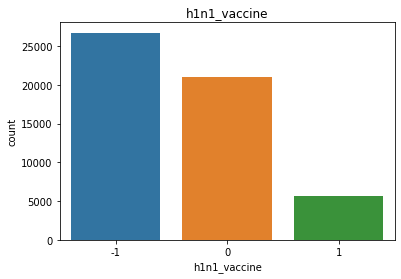

In [9]:
fig = sb.countplot(dataset['h1n1_vaccine'])
plt.title('h1n1_vaccine')
plt.show(fig)

### h1n1_vaccine has to be balanced

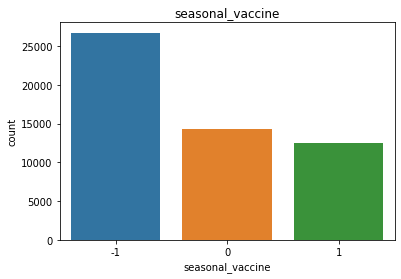

In [10]:
fig = sb.countplot(dataset['seasonal_vaccine'])
plt.title('seasonal_vaccine')
plt.show(fig)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 38 columns):
respondent_id                  53415 non-null int64
h1n1_concern                   53238 non-null float64
h1n1_knowledge                 53177 non-null float64
behavioral_antiviral_meds      53265 non-null float64
behavioral_avoidance           52994 non-null float64
behavioral_face_mask           53377 non-null float64
behavioral_wash_hands          53333 non-null float64
behavioral_large_gatherings    53256 non-null float64
behavioral_outside_home        53251 non-null float64
behavioral_touch_face          53159 non-null float64
doctor_recc_h1n1               49095 non-null float64
doctor_recc_seasonal           49095 non-null float64
chronic_med_condition          51512 non-null float64
child_under_6_months           51782 non-null float64
health_worker                  51822 non-null float64
health_insurance               28913 non-null float64
opinion_h1n1_vacc_effective  

In [12]:
dataset.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  rent_or_own   employment_status  \
0                    1.0  ...          Own  Not in Labor Force   
1                    1.0  ...         Rent            Employed   
2                    0.0  ...          Own            Employed   
3                    0.0  ...         Rent  Not in Labor Force   
4                    1.0  ...          Own            Employed   

   hhs_geo_region                census_msa  household_adults  \
0        oxchjgsf                   Non-MSA               0.0   
1        bhuqouqj  MSA, Not Principle  City               0.0   
2        qufhixun  MSA, Not Principle  City               2.0   
3        lrircsnp       MSA, Principle City               0.0   
4        qufhixun  MSA, Not Principle  City               1.0   

   household_children  employment_industry  employment_occupation  \
0                 0.0                  NaN                    NaN   
1                 0.0             pxcmvdjn               xgwztkwe   
2                 0.0             rucpziij               xtkaffoo   
3                 0.0                  NaN                    NaN   
4                 0.0             wxleyezf               emcorrxb   

   h1n1_vaccine  seasonal_vaccine  
0             0                 0  
1             0                 1  
2             0                 0  
3             0                 1  
4             0                 0  

[5 rows x 38 columns]

In [13]:
dataset.isna().sum()

respondent_id                      0
h1n1_concern                     177
h1n1_knowledge                   238
behavioral_antiviral_meds        150
behavioral_avoidance             421
behavioral_face_mask              38
behavioral_wash_hands             82
behavioral_large_gatherings      159
behavioral_outside_home          164
behavioral_touch_face            256
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
health_insurance               24502
opinion_h1n1_vacc_effective      789
opinion_h1n1_risk                768
opinion_h1n1_sick_from_vacc      770
opinion_seas_vacc_effective      914
opinion_seas_risk               1013
opinion_seas_sick_from_vacc     1058
age_group                          0
education                       2814
race                               0
sex                                0
income_poverty                  8920
m

In [14]:
dataset.loc[:, 'h1n1_concern'].value_counts(dropna=False)

2.0    21318
1.0    16311
3.0     9114
0.0     6495
NaN      177
Name: h1n1_concern, dtype: int64

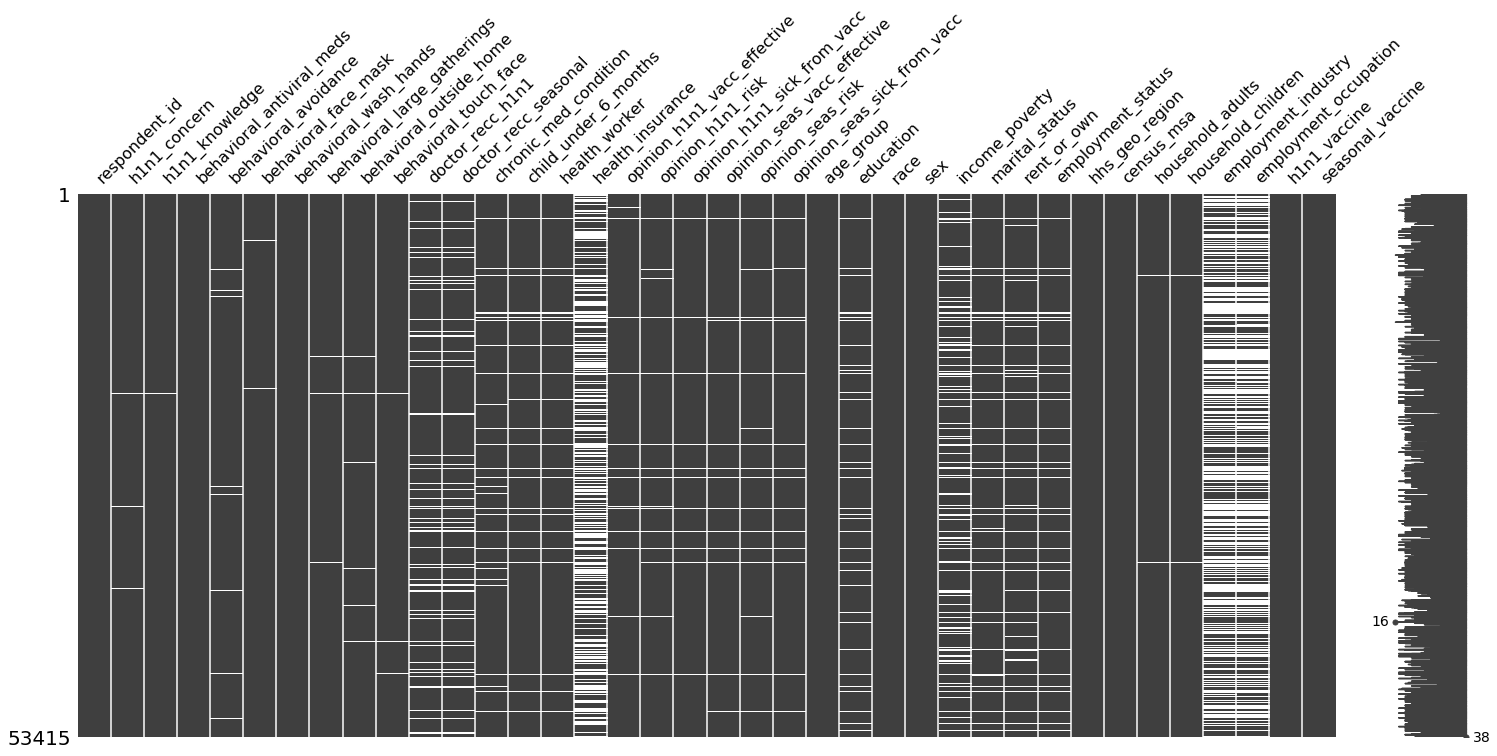

In [15]:
msno.matrix(dataset)

In [16]:
cols = dataset.iloc[:, 3:16].columns

In [17]:
for col in cols:
    print(dataset.loc[:, col].value_counts(dropna=False))

0.0    50642
1.0     2623
NaN      150
Name: behavioral_antiviral_meds, dtype: int64
1.0    38564
0.0    14430
NaN      421
Name: behavioral_avoidance, dtype: int64
0.0    49687
1.0     3690
NaN       38
Name: behavioral_face_mask, dtype: int64
1.0    44045
0.0     9288
NaN       82
Name: behavioral_wash_hands, dtype: int64
0.0    34346
1.0    18910
NaN      159
Name: behavioral_large_gatherings, dtype: int64
0.0    35291
1.0    17960
NaN      164
Name: behavioral_outside_home, dtype: int64
1.0    36175
0.0    16984
NaN      256
Name: behavioral_touch_face, dtype: int64
0.0    38221
1.0    10874
NaN     4320
Name: doctor_recc_h1n1, dtype: int64
0.0    32813
1.0    16282
NaN     4320
Name: doctor_recc_seasonal, dtype: int64
0.0    36978
1.0    14534
NaN     1903
Name: chronic_med_condition, dtype: int64
0.0    47409
1.0     4373
NaN     1633
Name: child_under_6_months, dtype: int64
0.0    46033
1.0     5789
NaN     1593
Name: health_worker, dtype: int64
1.0    25554
NaN    24502
0.0    

In [18]:
dataset = imputer_most_frequent(dataset, 3, 16)

In [19]:
dataset.isna().sum()

respondent_id                      0
h1n1_concern                     177
h1n1_knowledge                   238
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective      789
opinion_h1n1_risk                768
opinion_h1n1_sick_from_vacc      770
opinion_seas_vacc_effective      914
opinion_seas_risk               1013
opinion_seas_sick_from_vacc     1058
age_group                          0
education                       2814
race                               0
sex                                0
income_poverty                  8920
m

In [20]:
dataset.loc[:, 'h1n1_concern'].value_counts(dropna=False)

2.0    21318
1.0    16311
3.0     9114
0.0     6495
NaN      177
Name: h1n1_concern, dtype: int64

In [21]:
dataset.loc[:, 'h1n1_knowledge'].value_counts(dropna=False)

1.0    29227
2.0    19002
0.0     4948
NaN      238
Name: h1n1_knowledge, dtype: int64

In [22]:
dataset.iloc[:, 1:3].head()

h1n1_concern  h1n1_knowledge
0           1.0             0.0
1           3.0             2.0
2           1.0             1.0
3           1.0             1.0
4           2.0             1.0

In [23]:
dataset = imputer_most_frequent(dataset, 1, 3)

In [24]:
dataset.shape

(53415, 38)

In [25]:
cols = dataset.iloc[:, 16:22].columns

In [26]:
for col in cols:
    print(dataset.loc[:, col].value_counts(dropna=False))

4.0    23417
5.0    14231
3.0     9513
2.0     3658
1.0     1807
NaN      789
Name: opinion_h1n1_vacc_effective, dtype: int64
2.0    19861
1.0    16346
4.0    10659
5.0     3434
3.0     2347
NaN      768
Name: opinion_h1n1_risk, dtype: int64
2.0    18306
1.0    17933
4.0    11760
5.0     4337
NaN      770
3.0      309
Name: opinion_h1n1_sick_from_vacc, dtype: int64
4.0    23131
5.0    19970
2.0     4490
3.0     2537
1.0     2373
NaN      914
Name: opinion_seas_vacc_effective, dtype: int64
2.0    18026
4.0    15239
1.0    11913
5.0     5811
3.0     1413
NaN     1013
Name: opinion_seas_risk, dtype: int64
1.0    23447
2.0    15422
4.0     9799
5.0     3503
NaN     1058
3.0      186
Name: opinion_seas_sick_from_vacc, dtype: int64


In [27]:
dataset = imputer_most_frequent(dataset, 16, 22)

In [28]:
dataset.isna().sum()

respondent_id                      0
h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       2814
race                               0
sex                                0
income_poverty                  8920
m

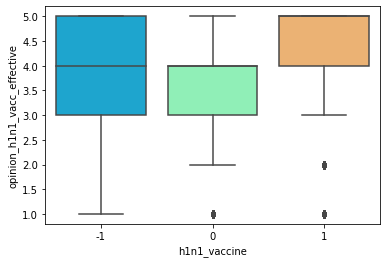

In [29]:
sb.boxplot(x='h1n1_vaccine', y='opinion_h1n1_vacc_effective', data=dataset, palette='rainbow')

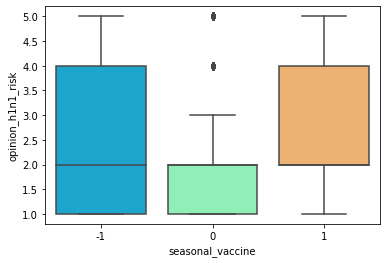

In [30]:
sb.boxplot(x='seasonal_vaccine', y='opinion_h1n1_risk', data=dataset, palette='rainbow')

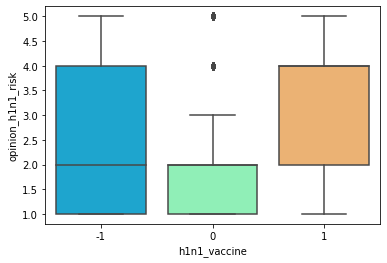

In [31]:
sb.boxplot(x='h1n1_vaccine', y='opinion_h1n1_risk', data=dataset, palette='rainbow')

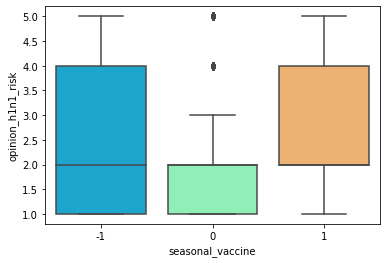

In [32]:
sb.boxplot(x='seasonal_vaccine', y='opinion_h1n1_risk', data=dataset, palette='rainbow')

In [33]:
cols

Index(['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc'],
      dtype='object')

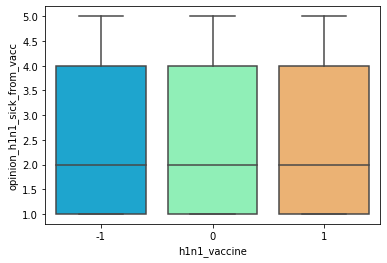

In [34]:
sb.boxplot(x='h1n1_vaccine', y='opinion_h1n1_sick_from_vacc', data=dataset, palette='rainbow')

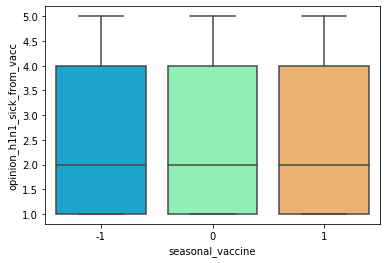

In [35]:
sb.boxplot(x='seasonal_vaccine', y='opinion_h1n1_sick_from_vacc', data=dataset, palette='rainbow')

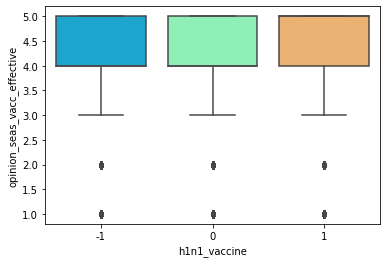

In [36]:
sb.boxplot(x='h1n1_vaccine', y='opinion_seas_vacc_effective', data=dataset, palette='rainbow')

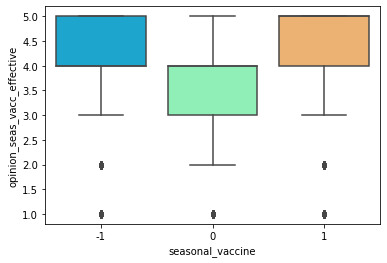

In [37]:
sb.boxplot(x='seasonal_vaccine', y='opinion_seas_vacc_effective', data=dataset, palette='rainbow')

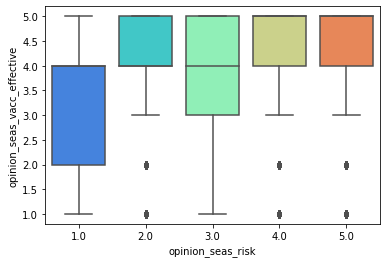

In [38]:
sb.boxplot(x='opinion_seas_risk', y='opinion_seas_vacc_effective', data=dataset, palette='rainbow')

In [39]:
dataset.iloc[:, 22:30].head()

age_group         education   race     sex             income_poverty  \
0  55 - 64 Years        < 12 Years  White  Female              Below Poverty   
1  35 - 44 Years          12 Years  White    Male              Below Poverty   
2  18 - 34 Years  College Graduate  White    Male  <= $75,000, Above Poverty   
3      65+ Years          12 Years  White  Female              Below Poverty   
4  45 - 54 Years      Some College  White  Female  <= $75,000, Above Poverty   

  marital_status rent_or_own   employment_status  
0    Not Married         Own  Not in Labor Force  
1    Not Married        Rent            Employed  
2    Not Married         Own            Employed  
3    Not Married        Rent  Not in Labor Force  
4        Married         Own            Employed

In [40]:
cols = dataset.iloc[:, 22:30].columns

In [41]:
for col in cols:
    print(dataset.loc[:, col].value_counts(dropna=False))

65+ Years        13561
55 - 64 Years    11092
45 - 54 Years    10495
18 - 34 Years    10449
35 - 44 Years     7818
Name: age_group, dtype: int64
College Graduate    20283
Some College        14123
12 Years            11496
< 12 Years           4699
NaN                  2814
Name: education, dtype: int64
White                42523
Black                 4292
Hispanic              3458
Other or Multiple     3142
Name: race, dtype: int64
Female    31692
Male      21723
Name: sex, dtype: int64
<= $75,000, Above Poverty    25552
> $75,000                    13673
NaN                           8920
Below Poverty                 5270
Name: income_poverty, dtype: int64
Married        27103
Not Married    23462
NaN             2850
Name: marital_status, dtype: int64
Own     37457
Rent    11880
NaN      4078
Name: rent_or_own, dtype: int64
Employed              27192
Not in Labor Force    20323
Unemployed             2966
NaN                    2934
Name: employment_status, dtype: int64


In [42]:
dataset = imputer_most_frequent(dataset, 22, 30)

In [43]:
dataset.isna().sum()

respondent_id                      0
h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                          0
race                               0
sex                                0
income_poverty                     0
m

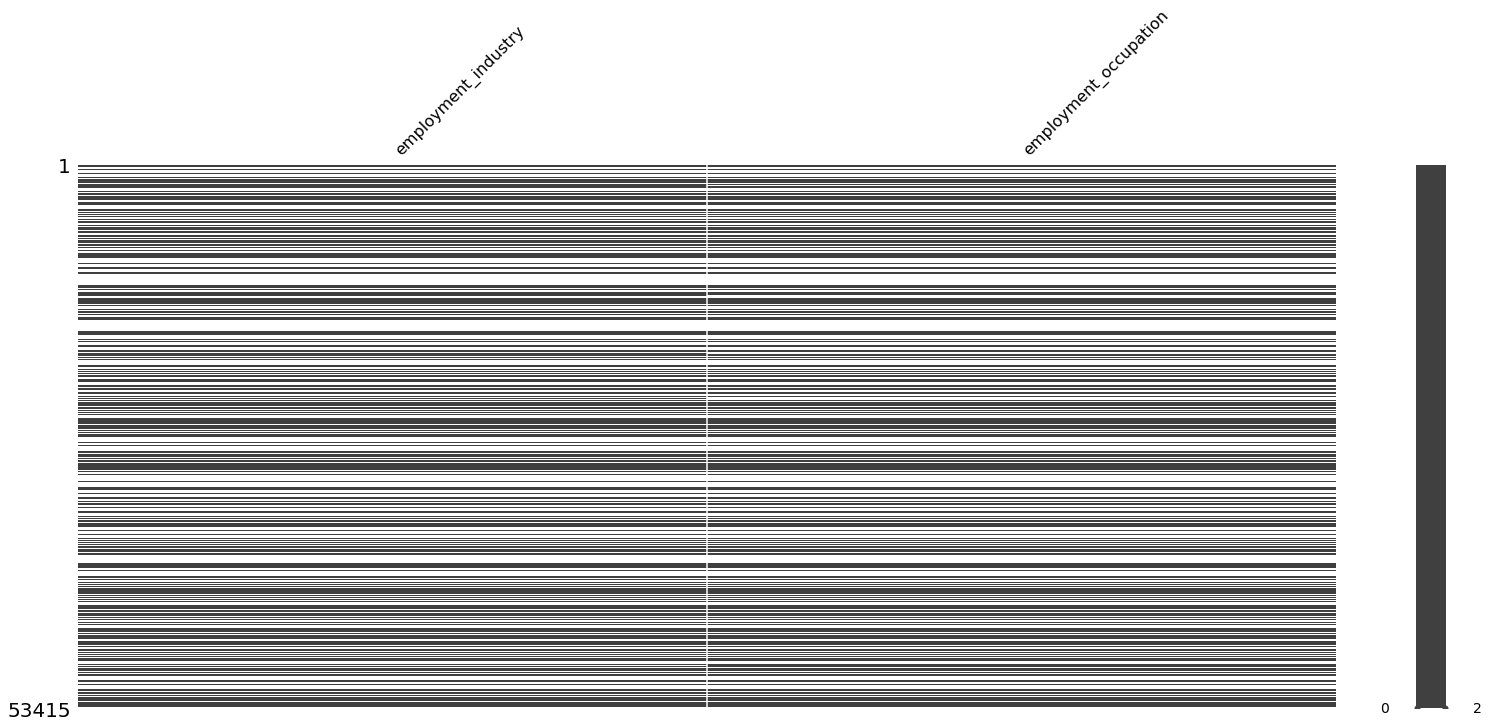

In [44]:
msno.matrix(dataset.iloc[:, 34:36])

In [45]:
dataset.iloc[:, 34:36].head(50)

employment_industry employment_occupation
0                  NaN                   NaN
1             pxcmvdjn              xgwztkwe
2             rucpziij              xtkaffoo
3                  NaN                   NaN
4             wxleyezf              emcorrxb
5             saaquncn              vlluhbov
6             xicduogh              xtkaffoo
7             pxcmvdjn              xqwwgdyp
8             xicduogh              ccgxvspp
9                  NaN                   NaN
10            xicduogh              qxajmpny
11            xicduogh              ccgxvspp
12                 NaN                   NaN
13            ldnlellj              kldqjyjy
14                 NaN                   NaN
15            wxleyezf              emcorrxb
16                 NaN                   NaN
17            rucpziij              xtkaffoo
18            wlfvacwt              xgwztkwe
19                 NaN                   NaN
20                 NaN                   NaN
21            ldnlellj              mxkfnird
22            wxleyezf              emcorrxb
23                 NaN                   NaN
24                 NaN                   NaN
25            wxleyezf              emcorrxb
26            ldnlellj              hfxkjkmi
27                 NaN                   NaN
28                 NaN                   NaN
29                 NaN                   NaN
30            nduyfdeo              xtkaffoo
31                 NaN                   NaN
32                 NaN                   NaN
33                 NaN                   NaN
34            wxleyezf              bxpfxfdn
35                 NaN                   NaN
36            pxcmvdjn              xgwztkwe
37            ldnlellj              ukymxvdu
38                 NaN                   NaN
39            pxcmvdjn              xgwztkwe
40            xicduogh              qxajmpny
41            fcxhlnwr              cmhcxjea
42            saaquncn              vlluhbov
43                 NaN                   NaN
44            vjjrobsf              xtkaffoo
45            vjjrobsf              mxkfnird
46                 NaN                   NaN
47            vjjrobsf              xtkaffoo
48            wxleyezf              emcorrxb
49                 NaN                   NaN

In [46]:
dataset.iloc[:, 32].value_counts(dropna=False)

1.0    29007
0.0    15999
2.0     5673
3.0     2262
NaN      474
Name: household_adults, dtype: int64

In [47]:
dataset.iloc[:, 33].value_counts(dropna=False)

0.0    37243
1.0     6403
2.0     5744
3.0     3551
NaN      474
Name: household_children, dtype: int64

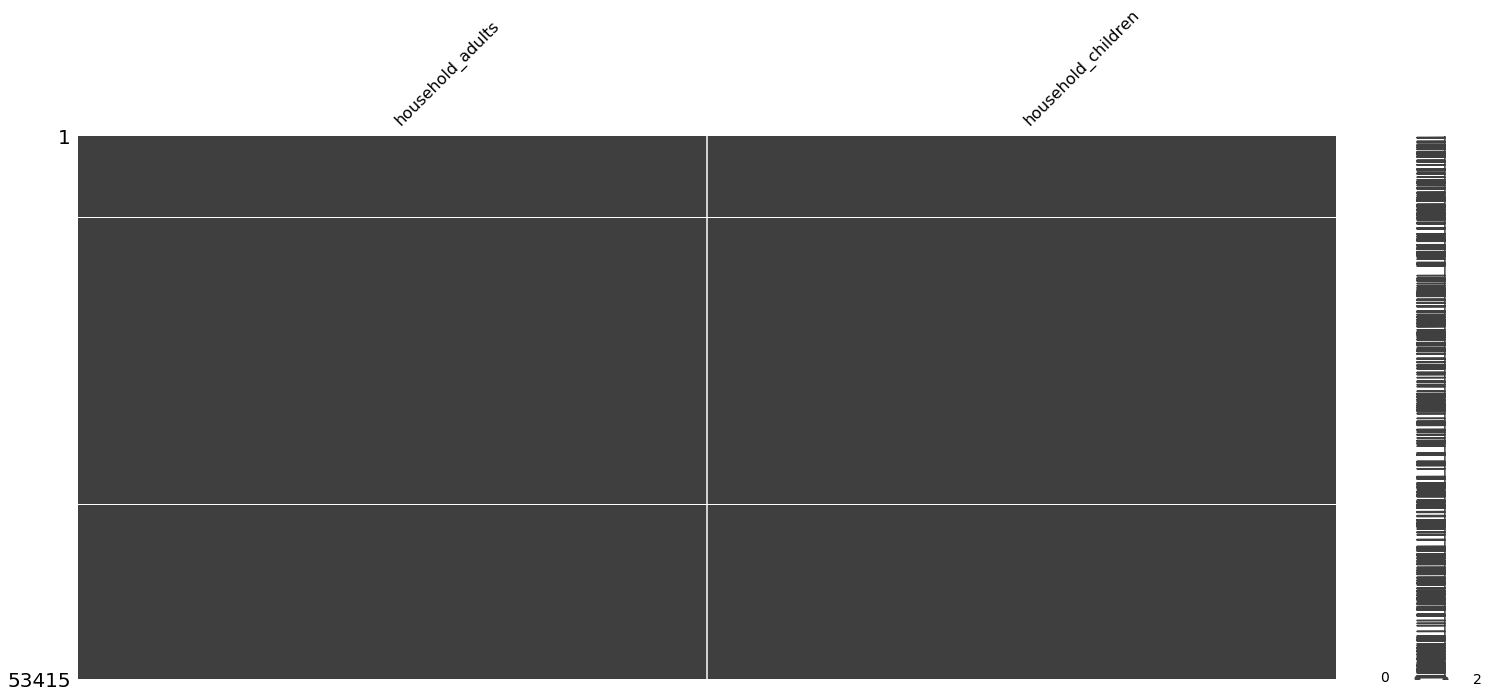

In [48]:
msno.matrix(dataset.iloc[:, 32:34])

In [49]:
dataset.iloc[:, 32].value_counts(dropna=False)

1.0    29007
0.0    15999
2.0     5673
3.0     2262
NaN      474
Name: household_adults, dtype: int64

In [50]:
dataset.iloc[:, 34].value_counts(dropna=False)

NaN         26605
fcxhlnwr     4952
wxleyezf     3609
ldnlellj     2455
pxcmvdjn     2115
arjwrbjb     1756
atmlpfrs     1748
xicduogh     1698
mfikgejo     1263
vjjrobsf     1094
rucpziij     1061
xqicxuve     1038
saaquncn      676
cfqqtusy      629
nduyfdeo      578
mcubkhph      537
wlfvacwt      427
dotnnunm      421
haxffmxo      308
msuufmds      256
phxvnwax      170
qnlwzans       19
Name: employment_industry, dtype: int64

In [51]:
dataset.iloc[:, 35].value_counts(dropna=False)

NaN         26896
xtkaffoo     3526
mxkfnird     3070
emcorrxb     2554
cmhcxjea     2471
xgwztkwe     2220
hfxkjkmi     1491
qxajmpny     1047
xqwwgdyp      960
uqqtjvyb      953
kldqjyjy      915
tfqavkke      790
ccgxvspp      709
ukymxvdu      701
oijqvulv      690
vlluhbov      679
bxpfxfdn      662
haliazsg      596
rcertsgn      573
dlvbwzss      472
xzmlyyjv      464
hodpvpew      461
dcjcmpih      309
pvmttkik      206
Name: employment_occupation, dtype: int64

In [52]:
dataset = imputer_most_frequent(dataset, 32, 34)

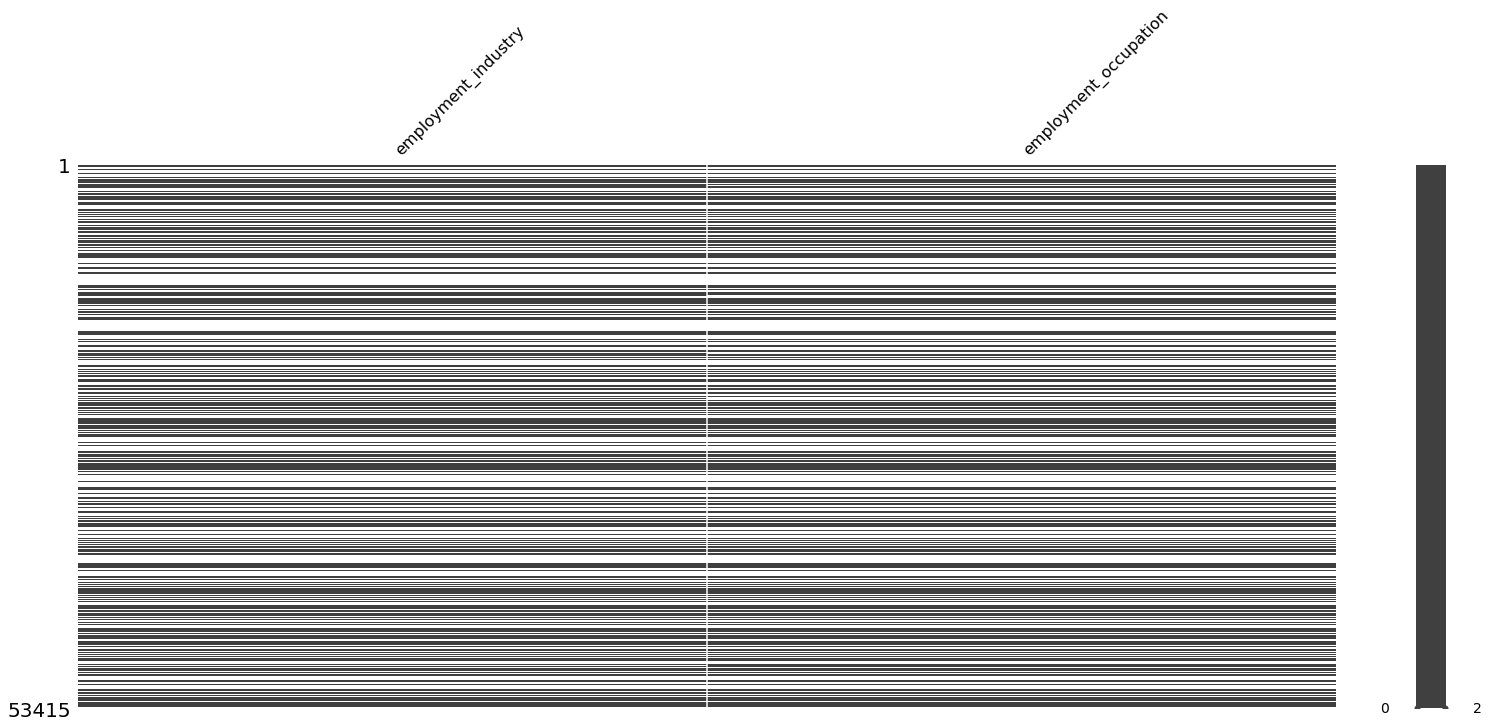

In [53]:
msno.matrix(dataset.iloc[:, 34:36])

In [54]:
dataset.isna().sum()

respondent_id                      0
h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                          0
race                               0
sex                                0
income_poverty                     0
m

In [55]:
pd.crosstab(index=dataset.iloc[:, 34], columns=dataset.iloc[:, 35], margins=True)

employment_occupation  bxpfxfdn  ccgxvspp  cmhcxjea  dcjcmpih  dlvbwzss  \
employment_industry                                                       
arjwrbjb                     85        42        24         1       325   
atmlpfrs                      0       171         5         0         2   
cfqqtusy                      0        32         0         0         0   
dotnnunm                      0         7         0         0         3   
fcxhlnwr                    322         5      2187         0        13   
haxffmxo                      0         0         0       308         0   
ldnlellj                      1       300        41         0         2   
mcubkhph                      2         1         0         0        13   
mfikgejo                      2         2         2         0         4   
msuufmds                      0        33         1         0         1   
nduyfdeo                      0         2         3         0         4   
phxvnwax                      0        12         1         0         1   
pxcmvdjn                      0         2       120         0         7   
qnlwzans                      0         1         1         0         0   
rucpziij                      0         0         5         0         2   
saaquncn                      0         2         4         0        65   
vjjrobsf                    126         1         2         0         2   
wlfvacwt                      2         1         0         0         0   
wxleyezf                    122         1        74         0        12   
xicduogh                      0        75         1         0        11   
xqicxuve                      0        18         0         0         5   
All                         662       708      2471       309       472   

employment_occupation  emcorrxb  haliazsg  hfxkjkmi  hodpvpew  kldqjyjy  ...  \
employment_industry                                                      ...   
arjwrbjb                     10         3       202        72       103  ...   
atmlpfrs                      2         1        88        36        45  ...   
cfqqtusy                     38         0        19         0        62  ...   
dotnnunm                      0         0        32         1        10  ...   
fcxhlnwr                    103       547        98        93        62  ...   
haxffmxo                      0         0         0         0         0  ...   
ldnlellj                      2         3       326       160       424  ...   
mcubkhph                     10         0        19         3         9  ...   
mfikgejo                      4         0       336         2        69  ...   
msuufmds                      2         0        25         9         8  ...   
nduyfdeo                      1         0        11        28         2  ...   
phxvnwax                      1         0         4         6         0  ...   
pxcmvdjn                      2         7        73         0        17  ...   
qnlwzans                      0         0         3         0         1  ...   
rucpziij                      2         0         4         1         1  ...   
saaquncn                      2         4        34         1        12  ...   
vjjrobsf                      3        23        43         3         6  ...   
wlfvacwt                      0         0        34         0         0  ...   
wxleyezf                   2363         7        73        39        57  ...   
xicduogh                      2         0        32         4         4  ...   
xqicxuve                      4         0        21         0        14  ...   
All                        2551       595      1477       458       906  ...   

employment_occupation  rcertsgn  tfqavkke  ukymxvdu  uqqtjvyb  vlluhbov  \
employment_industry                                                       
arjwrbjb                     19         5        25        15         9   
atmlpfrs                     65         1        24  

In [56]:
df1 = dataset.iloc[:, 22:30]

In [57]:
df1

age_group         education   race     sex  \
0      55 - 64 Years        < 12 Years  White  Female   
1      35 - 44 Years          12 Years  White    Male   
2      18 - 34 Years  College Graduate  White    Male   
3          65+ Years          12 Years  White  Female   
4      45 - 54 Years      Some College  White  Female   
...              ...               ...    ...     ...   
53410  35 - 44 Years  College Graduate  White  Female   
53411  18 - 34 Years          12 Years  White    Male   
53412  18 - 34 Years      Some College  White  Female   
53413  55 - 64 Years      Some College  White  Female   
53414  45 - 54 Years  College Graduate  White  Female   

                  income_poverty marital_status rent_or_own  \
0                  Below Poverty    Not Married         Own   
1                  Below Poverty    Not Married        Rent   
2      <= $75,000, Above Poverty    Not Married         Own   
3                  Below Poverty    Not Married        Rent   
4      <= $75,000, Above Poverty        Married         Own   
...                          ...            ...         ...   
53410  <= $75,000, Above Poverty        Married         Own   
53411              Below Poverty        Married        Rent   
53412              Below Poverty    Not Married        Rent   
53413  <= $75,000, Above Poverty        Married         Own   
53414  <= $75,000, Above Poverty    Not Married        Rent   

        employment_status  
0      Not in Labor Force  
1                Employed  
2                Employed  
3      Not in Labor Force  
4                Employed  
...                   ...  
53410            Employed  
53411            Employed  
53412  Not in Labor Force  
53413  Not in Labor Force  
53414            Employed  

[53415 rows x 8 columns]

In [58]:
corr_categories(df1)

Var1               Var2  Corr_Cat
49  employment_status          age_group  0.167520
6           age_group  employment_status  0.089422
46        rent_or_own     income_poverty  0.087175
29     income_poverty          education  0.086804
47        rent_or_own     marital_status  0.085427
39     marital_status     income_poverty  0.066122
40     marital_status        rent_or_own  0.066018
10          education     income_poverty  0.059306
42        rent_or_own          age_group  0.055228
33     income_poverty        rent_or_own  0.053721
32     income_poverty     marital_status  0.052727
53  employment_status     income_poverty  0.043189
34     income_poverty  employment_status  0.042749
44        rent_or_own               race  0.039783
50  employment_status          education  0.039350
28     income_poverty          age_group  0.037898
43        rent_or_own          education  0.031697
19               race        rent_or_own  0.028959
36     marital_status          education  0.027783
17               race     income_poverty  0.027270
13          education  employment_status  0.026611
35     marital_status          age_group  0.026303
14               race          age_group  0.024625
30     income_poverty               race  0.023086
15               race          education  0.022989
3           age_group     income_poverty  0.020438
5           age_group        rent_or_own  0.018354
41     marital_status  employment_status  0.017525
11          education     marital_status  0.015136
54  employment_status     marital_status  0.014118
12          education        rent_or_own  0.013345
27                sex  employment_status  0.013306
8           education               race  0.013296
37     marital_status               race  0.012619
18               race     marital_status  0.011886
4           age_group     marital_status  0.011311
1           age_group               race  0.011243
52  employment_status                sex  0.010561
48        rent_or_own  employment_status  0.009805
7           education          age_group  0.009752
0           age_group          education  0.007698
55  employment_status        rent_or_own  0.006105
20               race  employment_status  0.004942
24                sex     income_poverty  0.004265
51  employment_status               race  0.004227
21                sex          age_group  0.003432
31     income_poverty                sex  0.003351
25                sex     marital_status  0.002159
22                sex          education  0.002141
38     marital_status                sex  0.002128
23                sex               race  0.001605
16               race                sex  0.001489
2           age_group                sex  0.001454
9           education                sex  0.001149
45        rent_or_own                sex  0.000104
26                sex        rent_or_own  0.000081

In [59]:
del df1

In [60]:
dataset.iloc[:, 16:22].columns

Index(['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc'],
      dtype='object')

In [61]:
dataset.iloc[:, 16:22].corr()

opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
opinion_h1n1_vacc_effective                     1.000000           0.256805   
opinion_h1n1_risk                               0.256805           1.000000   
opinion_h1n1_sick_from_vacc                     0.063045           0.331151   
opinion_seas_vacc_effective                     0.466980           0.220564   
opinion_seas_risk                               0.250928           0.558330   
opinion_seas_sick_from_vacc                     0.016481           0.196133   

                             opinion_h1n1_sick_from_vacc  \
opinion_h1n1_vacc_effective                     0.063045   
opinion_h1n1_risk                               0.331151   
opinion_h1n1_sick_from_vacc                     1.000000   
opinion_seas_vacc_effective                     0.077740   
opinion_seas_risk                               0.267255   
opinion_seas_sick_from_vacc                     0.490479   

                             opinion_seas_vacc_effective  opinion_seas_risk  \
opinion_h1n1_vacc_effective                     0.466980           0.250928   
opinion_h1n1_risk                               0.220564           0.558330   
opinion_h1n1_sick_from_vacc                     0.077740           0.267255   
opinion_seas_vacc_effective                     1.000000           0.340098   
opinion_seas_risk                               0.340098           1.000000   
opinion_seas_sick_from_vacc                    -0.018941           0.204353   

                             opinion_seas_sick_from_vacc  
opinion_h1n1_vacc_effective                     0.016481  
opinion_h1n1_risk                               0.196133  
opinion_h1n1_sick_from_vacc                     0.490479  
opinion_seas_vacc_effective                    -0.018941  
opinion_seas_risk                               0.204353  
opinion_seas_sick_from_vacc                     1.000000

In [62]:
dataset.iloc[:, 30:32].head()

hhs_geo_region                census_msa
0       oxchjgsf                   Non-MSA
1       bhuqouqj  MSA, Not Principle  City
2       qufhixun  MSA, Not Principle  City
3       lrircsnp       MSA, Principle City
4       qufhixun  MSA, Not Principle  City

In [63]:
dataset.iloc[:, 30].value_counts(dropna=False)

lzgpxyit    8660
fpwskwrf    6506
qufhixun    6166
oxchjgsf    5846
bhuqouqj    5713
kbazzjca    5702
mlyzmhmf    4426
lrircsnp    4100
atmpeygn    4019
dqpwygqj    2277
Name: hhs_geo_region, dtype: int64

In [64]:
dataset.iloc[:, 31].value_counts(dropna=False)

MSA, Not Principle  City    23571
MSA, Principle City         15669
Non-MSA                     14175
Name: census_msa, dtype: int64

In [65]:
df1 = dataset.iloc[:, 30:32]

In [66]:
corr_categories(df1)

Var1            Var2  Corr_Cat
1      census_msa  hhs_geo_region  0.038200
0  hhs_geo_region      census_msa  0.018188

In [67]:
dataset.loc[:, 'employment_industry'].fillna('other', inplace=True)
dataset.loc[:, 'employment_occupation'].fillna('other', inplace=True)

In [68]:
dataset.iloc[:, 22:30].head()

age_group         education   race     sex             income_poverty  \
0  55 - 64 Years        < 12 Years  White  Female              Below Poverty   
1  35 - 44 Years          12 Years  White    Male              Below Poverty   
2  18 - 34 Years  College Graduate  White    Male  <= $75,000, Above Poverty   
3      65+ Years          12 Years  White  Female              Below Poverty   
4  45 - 54 Years      Some College  White  Female  <= $75,000, Above Poverty   

  marital_status rent_or_own   employment_status  
0    Not Married         Own  Not in Labor Force  
1    Not Married        Rent            Employed  
2    Not Married         Own            Employed  
3    Not Married        Rent  Not in Labor Force  
4        Married         Own            Employed

In [69]:
dic_age = {'65+ Years': 'GT_65', 
            '55 - 64 Years': 'A_55_64',
            '45 - 54 Years': 'A_45_54',
            '18 - 34 Years': 'A_18_34',
            '35 - 44 Years': 'A_35_44'}


In [70]:
dataset.loc[:, 'age_group'].value_counts(dropna=False)
dataset['age_group'] = dataset['age_group'].map(dic_age)

In [71]:
dataset.loc[:, 'education'].value_counts()

College Graduate    23097
Some College        14123
12 Years            11496
< 12 Years           4699
Name: education, dtype: int64

In [72]:
dic_edu = {'College Graduate': 'GT_65', 
            'Some College': 'SomeCollege',
            '12 Years': '55_64Years',
            'Some College': '45_54Years',
            '12 Years': '12Years',
            '35 - 44 Years': '35_44Years'}

In [73]:
dataset.loc[:, 'education'].value_counts(dropna=False)
dataset['education'] = dataset['education'].map(dic_edu)

In [74]:
df1 = dataset.iloc[:, 22:36]

In [75]:
df1.head()

age_group   education   race     sex             income_poverty  \
0   A_55_64         NaN  White  Female              Below Poverty   
1   A_35_44     12Years  White    Male              Below Poverty   
2   A_18_34       GT_65  White    Male  <= $75,000, Above Poverty   
3     GT_65     12Years  White  Female              Below Poverty   
4   A_45_54  45_54Years  White  Female  <= $75,000, Above Poverty   

  marital_status rent_or_own   employment_status hhs_geo_region  \
0    Not Married         Own  Not in Labor Force       oxchjgsf   
1    Not Married        Rent            Employed       bhuqouqj   
2    Not Married         Own            Employed       qufhixun   
3    Not Married        Rent  Not in Labor Force       lrircsnp   
4        Married         Own            Employed       qufhixun   

                 census_msa  household_adults  household_children  \
0                   Non-MSA               0.0                 0.0   
1  MSA, Not Principle  City               0.0                 0.0   
2  MSA, Not Principle  City               2.0                 0.0   
3       MSA, Principle City               0.0                 0.0   
4  MSA, Not Principle  City               1.0                 0.0   

  employment_industry employment_occupation  
0               other                 other  
1            pxcmvdjn              xgwztkwe  
2            rucpziij              xtkaffoo  
3               other                 other  
4            wxleyezf              emcorrxb

In [76]:
dataset.loc[:, 'income_poverty'].value_counts(dropna=False)

<= $75,000, Above Poverty    34472
> $75,000                    13673
Below Poverty                 5270
Name: income_poverty, dtype: int64

In [77]:
dic_inc = {'<= $75,000, Above Poverty': 'AbovePoverty',
            '> $75,000': 'Medium Poverty',
            'Below Poverty': 'BelowPoverty'}

In [78]:
dataset['income_poverty'] = dataset['income_poverty'].map(dic_inc)

In [79]:
dataset.loc[:, 'marital_status'].value_counts(dropna=False)

Married        29953
Not Married    23462
Name: marital_status, dtype: int64

In [80]:
dataset['marital_status1'] = np.where(dataset['marital_status'] == 'Married', 1, 0)

In [81]:
del dataset['marital_status']

In [82]:
dataset.loc[:, 'rent_or_own'].value_counts(dropna=False)

Own     41535
Rent    11880
Name: rent_or_own, dtype: int64

In [83]:
dataset['rent_or_own1'] = np.where(dataset['rent_or_own'] == 'Own', 1, 0)

In [84]:
del dataset['rent_or_own']

In [85]:
dataset.loc[:, 'hhs_geo_region'].value_counts(dropna=False)

lzgpxyit    8660
fpwskwrf    6506
qufhixun    6166
oxchjgsf    5846
bhuqouqj    5713
kbazzjca    5702
mlyzmhmf    4426
lrircsnp    4100
atmpeygn    4019
dqpwygqj    2277
Name: hhs_geo_region, dtype: int64

In [86]:
dataset.loc[:, 'employment_status'].value_counts(dropna=False)

Employed              30126
Not in Labor Force    20323
Unemployed             2966
Name: employment_status, dtype: int64

In [87]:
dic_emp = {'Employed': 'Employed',
            'Not in Labor Force': 'NotLabForce',
            'Unemployed': 'Unemployed'}

In [88]:
dataset['employment_status'] = dataset['employment_status'].map(dic_emp)

In [89]:
dataset.loc[:, 'census_msa'].value_counts(dropna=False)

MSA, Not Principle  City    23571
MSA, Principle City         15669
Non-MSA                     14175
Name: census_msa, dtype: int64

In [90]:
dic_census = {'MSA, Not Principle  City': 'MSANotPrincipleCity',
                'MSA, Principle City': 'MSAPrincipleCity',
                'Non-MSA': 'Non-MSA'}

In [91]:
dataset['census_msa'] = dataset['census_msa'].map(dic_census)

In [92]:
dataset.shape

(53415, 38)

In [93]:
catcols = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status1', 'rent_or_own1',
'hhs_geo_region', 'employment_status', 'census_msa', 'employment_industry', 'employment_occupation']

In [94]:
dataset = pd.get_dummies(dataset, prefix_sep="_", columns = catcols, drop_first=True)

In [95]:
dataset.shape

(53415, 97)

In [96]:
df1 = dataset.isna().sum()

In [97]:
type(df1)

pandas.core.series.Series

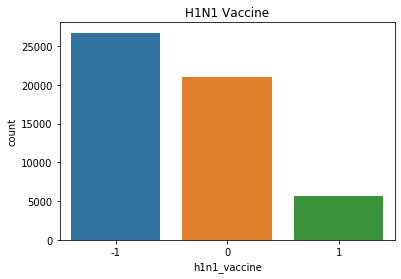

In [98]:
fig = sb.countplot(dataset['h1n1_vaccine'])
plt.title('H1N1 Vaccine')
plt.show(fig)

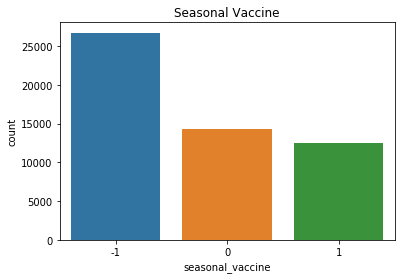

In [99]:
fig = sb.countplot(dataset['seasonal_vaccine'])
plt.title('Seasonal Vaccine')
plt.show(fig)

In [100]:
train = dataset.loc[(dataset['h1n1_vaccine'] != -1)]
test = dataset.loc[(dataset['h1n1_vaccine'] == -1)]
del test['h1n1_vaccine']
del test['seasonal_vaccine']

In [101]:
trainSetH1N1 = train.copy()
trainSetSeason = train.copy()
del trainSetH1N1['seasonal_vaccine']
del trainSetSeason['h1n1_vaccine']

In [102]:
trainSetH1N1.rename(columns={'respondent_id': 'id', 'h1n1_vaccine': 'target'}, inplace=True)
trainSetSeason.rename(columns={'respondent_id': 'id', 'seasonal_vaccine': 'target'}, inplace=True)
test.rename(columns={'respondent_id': 'id'}, inplace=True)

In [103]:
trainSetH1N1.to_csv('../input/trainSetH1N1.csv', index=False)
trainSetSeason.to_csv('../input/trainSetSeason.csv', index=False)
test.to_csv('../input/testSet.csv', index=False)